In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize , LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.models import Model, Sequential

from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

from functions import *

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=111)

In [6]:
# data read and types check
df = pd.read_csv('https://raw.githubusercontent.com/paq88/Fish_neural_network_classifier/refs/heads/main/Gut_analysis/Data/Gut_bacteria_merged.csv')
print(df.shape)
print(df.dtypes)
df.head()

(124, 127)
pond                                                                                           object
d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae             float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae       float64
d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae                    float64
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae                    float64
                                                                                               ...   
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae           float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae      float64
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae           float64
d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales

pond  \
0  Gut_S10   
1  Gut_S10   
2  Gut_S10   
3  Gut_S10   
4  Gut_S10   

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                             2319.0                                   
1                                             3391.0                                   
2                                             1338.0                                   
3                                             1582.0                                   
4                                             1463.0                                   

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                             2187.0                                         
1                                             2071.0                                         
2                                             7053.0                                         
3                                            15595.0                                         
4                                             3891.0                                         

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                             1743.0                            
1                                              355.0                            
2                                              669.0                            
3                                              124.0                            
4                                              541.0                            

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                              500.0                            
1                                             1054.0                            
2                                              279.0                            
3                                              503.0                            
4                                                7.0                            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
0                                              521.0                                          
1                                             1024.0                                          
2                                              329.0                                          
3                                              309.0                                          
4                                               13.0                                          

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__  \
0                                              286.0            
1                                             1952.0            
2                                               63.0            
3                                                5.0            
4                                               11.0            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae  \
0                                              366.0                                                
1                                               66.0                                                
2                                               52.0                                                
3                                             3418.0                                                
4                                               61.0                                                

   d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae  \
0                                              612.0                                       
1                                              217.0                                       
2       

in this approach we will fill missing values as 0, after normalisation we will change those values to some small number - 0.00001

In [7]:
df = df.fillna(0)
df.head()

pond  \
0  Gut_S10   
1  Gut_S10   
2  Gut_S10   
3  Gut_S10   
4  Gut_S10   

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                             2319.0                                   
1                                             3391.0                                   
2                                             1338.0                                   
3                                             1582.0                                   
4                                             1463.0                                   

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                             2187.0                                         
1                                             2071.0                                         
2                                             7053.0                                         
3                                            15595.0                                         
4                                             3891.0                                         

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                             1743.0                            
1                                              355.0                            
2                                              669.0                            
3                                              124.0                            
4                                              541.0                            

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                              500.0                            
1                                             1054.0                            
2                                              279.0                            
3                                              503.0                            
4                                                7.0                            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
0                                              521.0                                          
1                                             1024.0                                          
2                                              329.0                                          
3                                              309.0                                          
4                                               13.0                                          

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__  \
0                                              286.0            
1                                             1952.0            
2                                               63.0            
3                                                5.0            
4                                               11.0            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae  \
0                                              366.0                                                
1                                               66.0                                                
2                                               52.0                                                
3                                             3418.0                                                
4                                               61.0                                                

   d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae  \
0                                              612.0                                       
1                                              217.0                                       
2       

In [8]:
print(df.shape)
df.describe()
df

(124, 127)


pond  \
0    Gut_S10   
1    Gut_S10   
2    Gut_S10   
3    Gut_S10   
4    Gut_S10   
..       ...   
119   Gut_S9   
120   Gut_S9   
121   Gut_S9   
122   Gut_S9   
123   Gut_S9   

     d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                               2319.0                                   
1                                               3391.0                                   
2                                               1338.0                                   
3                                               1582.0                                   
4                                               1463.0                                   
..                                                 ...                                   
119                                              104.0                                   
120                                              750.0                                   
121                                              183.0                                   
122                                              490.0                                   
123                                               42.0                                   

     d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                               2187.0                                         
1                                               2071.0                                         
2                                               7053.0                                         
3                                              15595.0                                         
4                                               3891.0                                         
..                                                 ...                                         
119                                             9862.0                                         
120                                             3483.0                                         
121                                             1141.0                                         
122                                              167.0                                         
123                                             3597.0                                         

     d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                               1743.0                            
1                                                355.0                            
2                                                669.0                            
3                                                124.0                            
4                                                541.0                            
..                                                 ...                            
119                                              107.0                            
120                                              422.0                            
121                                              134.0                            
122                                                8.0                            
123                                               30.0                            

     d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                                500.0                            
1                                               1054.0                            
2                                                279.0                            
3                                                503.0                            
4                                                  7.0                            
..                                                 ...                            
119

In [9]:
predictors = df.columns[1:]
print(len(predictors))

126


Becouse we have a lot of big numbers and a lot of variation between collumns we might try to normalise the data for better results, on the other hand we could also not normalise so itll be easier for model to discover differences between bacteria abduance as a predictor value. our next steps are:
- plot our data to see for any outliers (ask prof) ew. outlier treatment 
- convert classification variable (target variable)
- create predictors and target varaiable sets
- normalise predictors set 

## Normalisation 
For AE sigmoid 

In [14]:
df_normalised = df.copy()
scaler = MinMaxScaler()
df_normalised[predictors] = scaler.fit_transform(df[predictors])
df_normalised.describe()

d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
count                                         124.000000                                   
mean                                            0.668710                                   
std                                             0.175351                                   
min                                             0.000000                                   
25%                                             0.554760                                   
50%                                             0.707387                                   
75%                                             0.791750                                   
max                                             1.000000                                   

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
count                                         124.000000                                         
mean                                            0.676601                                         
std                                             0.210854                                         
min                                             0.000000                                         
25%                                             0.569635                                         
50%                                             0.684615                                         
75%                                             0.845983                                         
max                                             1.000000                                         

       d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
count                                         124.000000                            
mean                                            0.600178                            
std                                             0.228689                            
min                                             0.000000                            
25%                                             0.529844                            
50%                                             0.648398                            
75%                                             0.761306                            
max                                             1.000000                            

       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
count                                         124.000000                            
mean                                            0.370844                            
std                                             0.298197                            
min                                             0.000000                            
25%                                             0.115773                            
50%                                             0.227424                            
75%                                             0.677830                            
max                                             1.000000                            

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
count                                         124.000000                                          
mean                                            0.409050                                          
std                                             0.323004                                          
min                                             0.000000                                          
25%                                             0.071892                                          
50%                                             0.423887                                          
75%                                             0.730792              

## CLR transformation

In [10]:
df[predictors] = pd.DataFrame(clr_manual(df[predictors]),columns = df[predictors].columns)

In [11]:
predictors


Index(['d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae',
       'd__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae',
       'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae',
       'd__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae',
       'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae',
       'd__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae',
       ...
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alterom

In [12]:
df.describe()

d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
count                                         124.000000                                   
mean                                            5.184129                                   
std                                             1.444798                                   
min                                            -0.325684                                   
25%                                             4.245242                                   
50%                                             5.502807                                   
75%                                             6.197913                                   
max                                             7.913779                                   

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
count                                         124.000000                                         
mean                                            8.149255                                         
std                                             1.072265                                         
min                                             4.708501                                         
25%                                             7.605297                                         
50%                                             8.190011                                         
75%                                             9.010625                                         
max                                             9.793854                                         

       d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
count                                         124.000000                            
mean                                            3.644067                            
std                                             1.554761                            
min                                            -0.436293                            
25%                                             3.165891                            
50%                                             3.971892                            
75%                                             4.739503                            
max                                             6.362286                            

       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
count                                         124.000000                            
mean                                            1.438091                            
std                                             2.158231                            
min                                            -1.245936                            
25%                                            -0.408017                            
50%                                             0.400069                            
75%                                             3.659931                            
max                                             5.991671                            

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
count                                         124.000000                                          
mean                                            1.940012                                          
std                                             2.209887                                          
min                                            -0.858576                                          
25%                                            -0.366712                                          
50%                                             2.041522                                          
75%                                             4.141260              

## conversion of class variable


Explanation of pond coding
| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [15]:
codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}
codes3 = {0 : [8,14,18,24,29], 1: [12,16,19,23,26,9,13,17,20,27], 2 : [10,21,28,30,32,11,15,22,25,31]}
codes2 = {0 : [8,14,18,24,29,12,16,19,23,26,9,13,17,20,27], 1 : [10,21,28,30,32,11,15,22,25,31]}

df['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
df['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
df['pond_2'] = df['pond'].apply(lambda x: pond_decoder(x,codes2))

df_normalised['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
df_normalised['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
df_normalised['pond_2'] = df['pond'].apply(lambda x: pond_decoder(x,codes2))


In [16]:
df = df.copy()
df_normalised = df_normalised.copy()

## Splitting data into train and test sets

In [17]:
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=111, stratify=df['pond_5'], shuffle=True)
df_train_val.shape, df_test.shape

((99, 130), (25, 130))

# PCA transformation

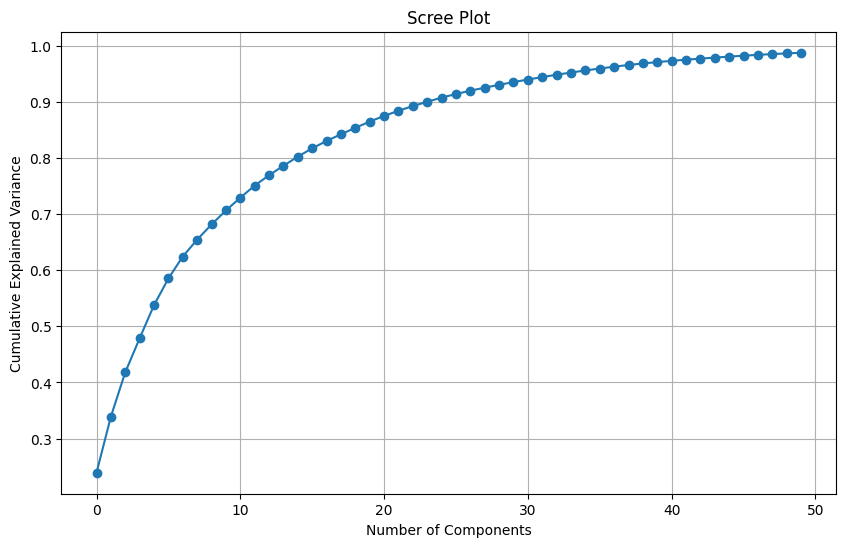

In [23]:
pca = PCA(n_components=50)

pca.fit(df_train_val[predictors])
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [81]:
n_components = 17
pca = PCA(n_components=n_components)
pca_train_val = pca.fit_transform(df_train_val[predictors])
pca_test = pca.transform(df_test[predictors])



# 5 classes


In [82]:
y_train_val = df_train_val['pond_5']
y_test = df_test['pond_5']

In [83]:
pca_train_df = pd.DataFrame(pca_train_val)
pc = pca_train_df.columns.tolist()
print(pc)
pca_train_df['pond'] = df_train_val['pond_5'].reset_index(drop=True)
pca_train_df


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


0         1         2         3         4         5         6  \
0  -1.529659  2.187943  0.850392 -3.326309 -1.741608  2.431252  2.414587   
1  -5.544876  4.872512 -1.399201  0.339921  1.117165  0.651794 -2.694320   
2   0.604753 -0.894988  3.133295  1.990869 -2.185218  0.456477  0.142828   
3  -4.443777 -1.518211  1.089225 -1.584826 -2.795100  4.022995 -0.277735   
4   1.659643  3.751227  0.671913  0.478617 -1.719021  1.443025  0.889360   
..       ...       ...       ...       ...       ...       ...       ...   
94  3.921274 -2.306293  6.115262  6.355544  0.563510 -3.694198 -3.088661   
95  3.497828 -4.696886  5.071012 -2.881811  2.434487  0.980854 -0.536513   
96 -4.927543 -0.030292 -1.161193  2.873016  1.697610 -3.913018  2.737800   
97 -6.031595  0.847882 -6.109537  2.532609  4.876704 -1.563252 -0.097265   
98 -0.968551  5.575417  5.589782  3.085644 -0.160351  2.531785 -1.092008   

           7         8         9        10        11        12        13  \
0  -3.357428  0.089042 -0.399723  1.944113  1.669004 -0.966417 -1.316026   
1   1.624890 -0.404929 -0.381246 -1.544415  0.174670 -0.514694  0.107890   
2  -0.942867 -2.598133 -3.198224 -0.276417 -1.721004  1.307418  0.544215   
3  -1.637063  1.949394  0.387526 -0.921720 -0.794303 -0.822457  1.160498   
4   0.135223  0.674731  2.414378  3.665817  2.082385 -2.885462 -1.822393   
..       ...       ...       ...       ...       ...       ...       ...   
94  1.076295  2.587139 -1.165800  1.749946 -0.959759 -1.377674 -0.409177   
95 -3.846542  2.152462  0.084693 -1.795352  1.456857  0.082100 -0.786937   
96 -0.954781 -2.160871 -1.437760 -1.510116 -0.371690  0.203663  1.157356   
97 -2.275784 -0.560545  0.724664  1.617126  0.582734  2.353476  0.867303   
98  1.751112  1.446513  0.206260 -2.170106  1.425067  0.003568  0.273846   

          14        15        16  pond  
0   0.720837 -0.627534 -0.916038     1  
1   0.128439  0.215460 -0.424933     0  
2  -0.300492  1.474370  2.284442     0  
3   2.018205 -0.601902  0.814342     0  
4  -2.212222 -0.378576  0.611227     1  
..       ...       ...       ...   ...  
94 -0.864838  0.783859  1.045590     4  
95  0.820157  1.730923  0.134903     2  
96  0.937394 -1.852284  1.189561     1  
97 -1.080089  2.244268 -0.725307     0  
98  2.658060 -0.231028  1.444024     3  

[99 rows x 18 columns]

## dense model 
fitting on embeded dataset


In [98]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(32, input_shape=(n_components,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
#model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(16, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.02)))

model1.add(keras.layers.Dense(16, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.02)))
#model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(8, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.02)))
model1.add(keras.layers.Dense(5, activation ='softmax'))

#model1.summary()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Crossvalidation

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 2.0354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [1 3 0 3 2 0 4 0 3 1 1 0 2 4 4 2 1 3 2 2]
true validation classes: [3 3 1 2 2 0 1 1 3 1 1 4 2 4 0 2 4 1 3 2]
mean confidence score: 80.5048, sd confidence score: 236.7353
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6000 - loss: 1.7757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
predicted classes:       [1 2 3 2 4 3 2 2 3 0 4 3 4 4 4 2 3 1 2 0]
true validation classes: [0 0 0 2 4 0 0 2 3 0 1 3 4 4 0 2 3 1 2 1]
mean confidence score: 369.8153, sd confidence score: 806.741
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5500 - loss: 2.5950
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [1 1 1 2 4 1 4 3 1 4 1 3 4 4 2 3 3 1 4 1]
true validation classes: [1 1 2 2 0 4 0 3 0 4 3 1 4 2 2 1 3 1 4 1]
mean confidence score: 440.6176, sd confidence score: 140

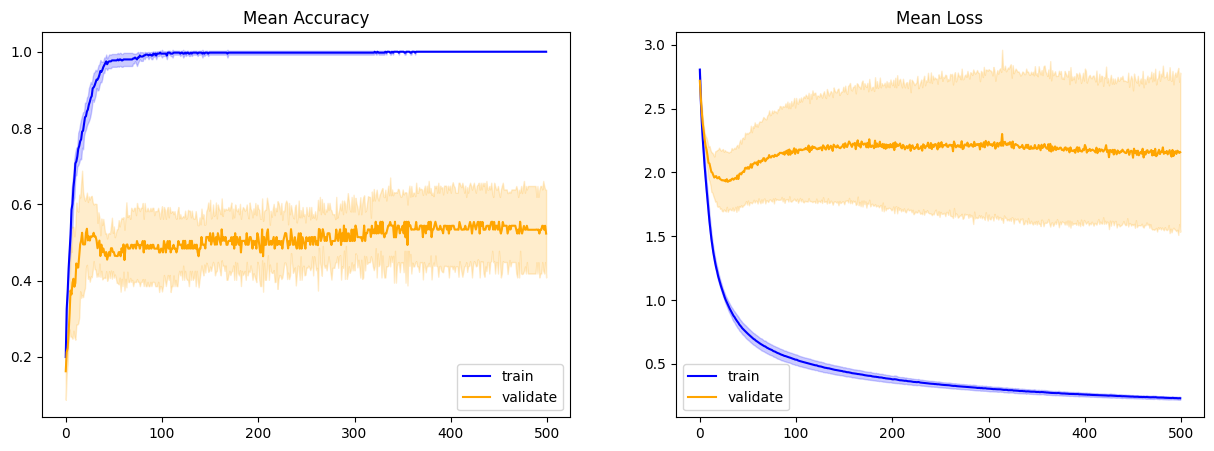

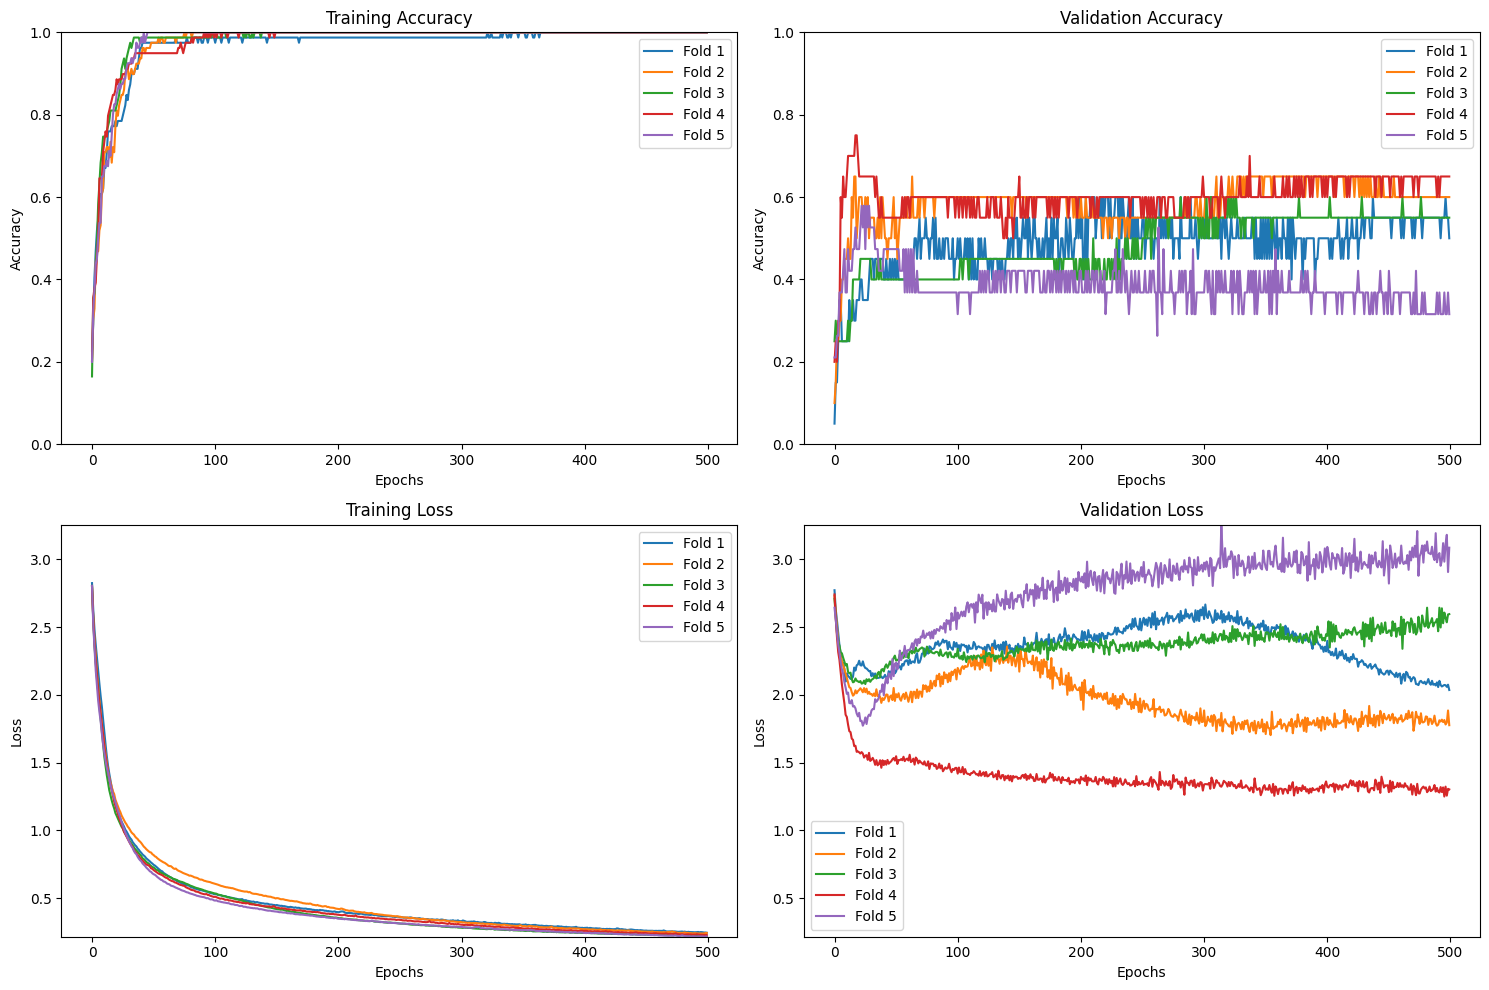

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
predicted classes:       [3 0 1 3 1 4 3 1 3 1 0 4 1 1 2 0 3 0 3]
true validation classes: [4 0 4 2 2 0 3 1 2 0 2 4 4 3 3 4 1 0 3]


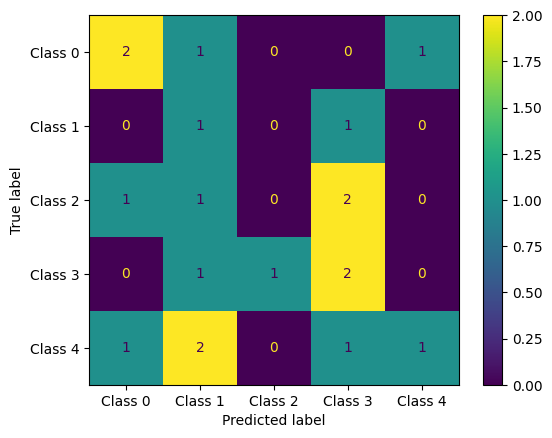

In [ ]:
reset_weights(model1)
crossvalidate(pca_train_df, model1, pc, 'pond', kf, 300)

### Test Dataset

In [114]:
X_train = pca_train_df[pc]
y_train = pca_train_df['pond']
y_train = keras.utils.to_categorical(y_train)

#X_test = pd.DataFrame(df_test[pc])
X_test = pca_test
y_test = df_test['pond_5']
y_test = keras.utils.to_categorical(y_test)

In [115]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((25, 17), (25, 5), (99, 17), (99, 5))

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2714 - loss: 2.7502 - val_accuracy: 0.1600 - val_loss: 2.5704
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 2.4336 - val_accuracy: 0.1600 - val_loss: 2.3854
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3973 - loss: 2.2220 - val_accuracy: 0.1200 - val_loss: 2.2364
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4211 - loss: 2.1560 - val_accuracy: 0.2800 - val_loss: 2.1426
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5702 - loss: 1.8608 - val_accuracy: 0.3600 - val_loss: 2.0764
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 1.7581 - val_accuracy: 0.3600 - val_loss: 1.9858
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 1.6592 - val_accuracy: 0.4000 - val_loss: 1.9167
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6831 - loss: 1.5264 - val_accuracy: 0.4000 - v

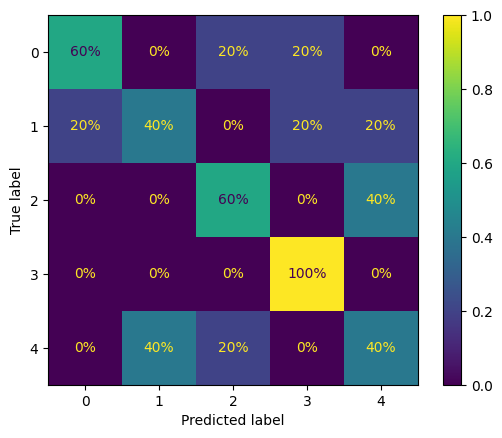

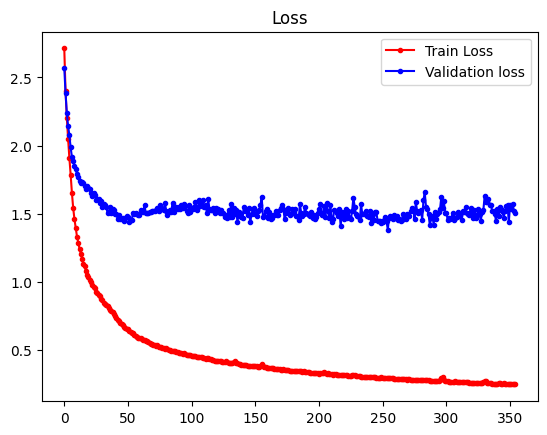

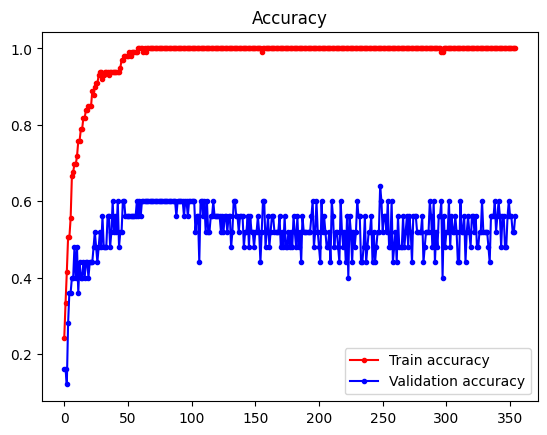

In [116]:
reset_weights(model1)
history1=model1.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model1, history1, X_test, y_test)

## Convolutional model

In [127]:
model1c = keras.Sequential()
model1c.add(keras.layers.Conv1D(filters=2, kernel_size=3, activation='relu',input_shape = (n_components,1),kernel_regularizer=keras.regularizers.l2(0.02)))
#model1c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model1c.add(keras.layers.MaxPooling1D(pool_size = 2))
model1c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.02)))
model1c.add(Flatten())
model1c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.02)))
model1c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.02)))

#model1c.add(keras.layers.Dropout(rate = 0.25))
model1c.add(keras.layers.Dense(16, activation = 'relu'))
model1c.add(keras.layers.Dense(5, activation ='softmax'))

model1c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 15, 2)          │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 7, 2)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 7, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,973 (35.05 KB)

 Trainable params: 8,973 (35.05 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.3000 - loss: 3.0343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
predicted classes:       [3 3 2 1 3 2 2 4 3 4 1 0 4 4 1 3 3 1 4 4]
true validation classes: [3 3 1 2 2 0 1 1 3 1 1 4 2 4 0 2 4 1 3 2]
mean confidence score: 131.833, sd confidence score: 424.9852
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3000 - loss: 2.1236
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [3 1 1 4 2 1 0 2 3 4 3 2 1 4 4 4 3 1 4 4]
true validation classes: [0 0 0 2 4 0 0 2 3 0 1 3 4 4 0 2 3 1 2 1]
mean confidence score: 15.6699, sd confidence score: 29.3618
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3000 - loss: 2.5120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [1 4 0 0 1 4 1 3 1 1 1 3 0 0 2 1 2 3 1 1]
true validation classes: [1 1 2 2 0 4 0 3 0 4 3 1 4 2 2 1 3 1 4 1]
mean confidence score: 7.674, sd confidence score: 7.3569

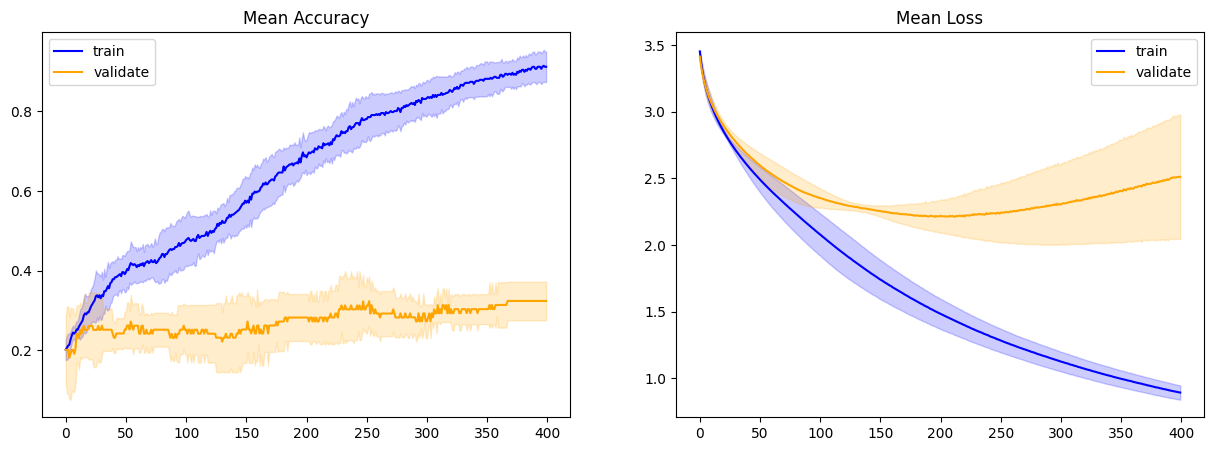

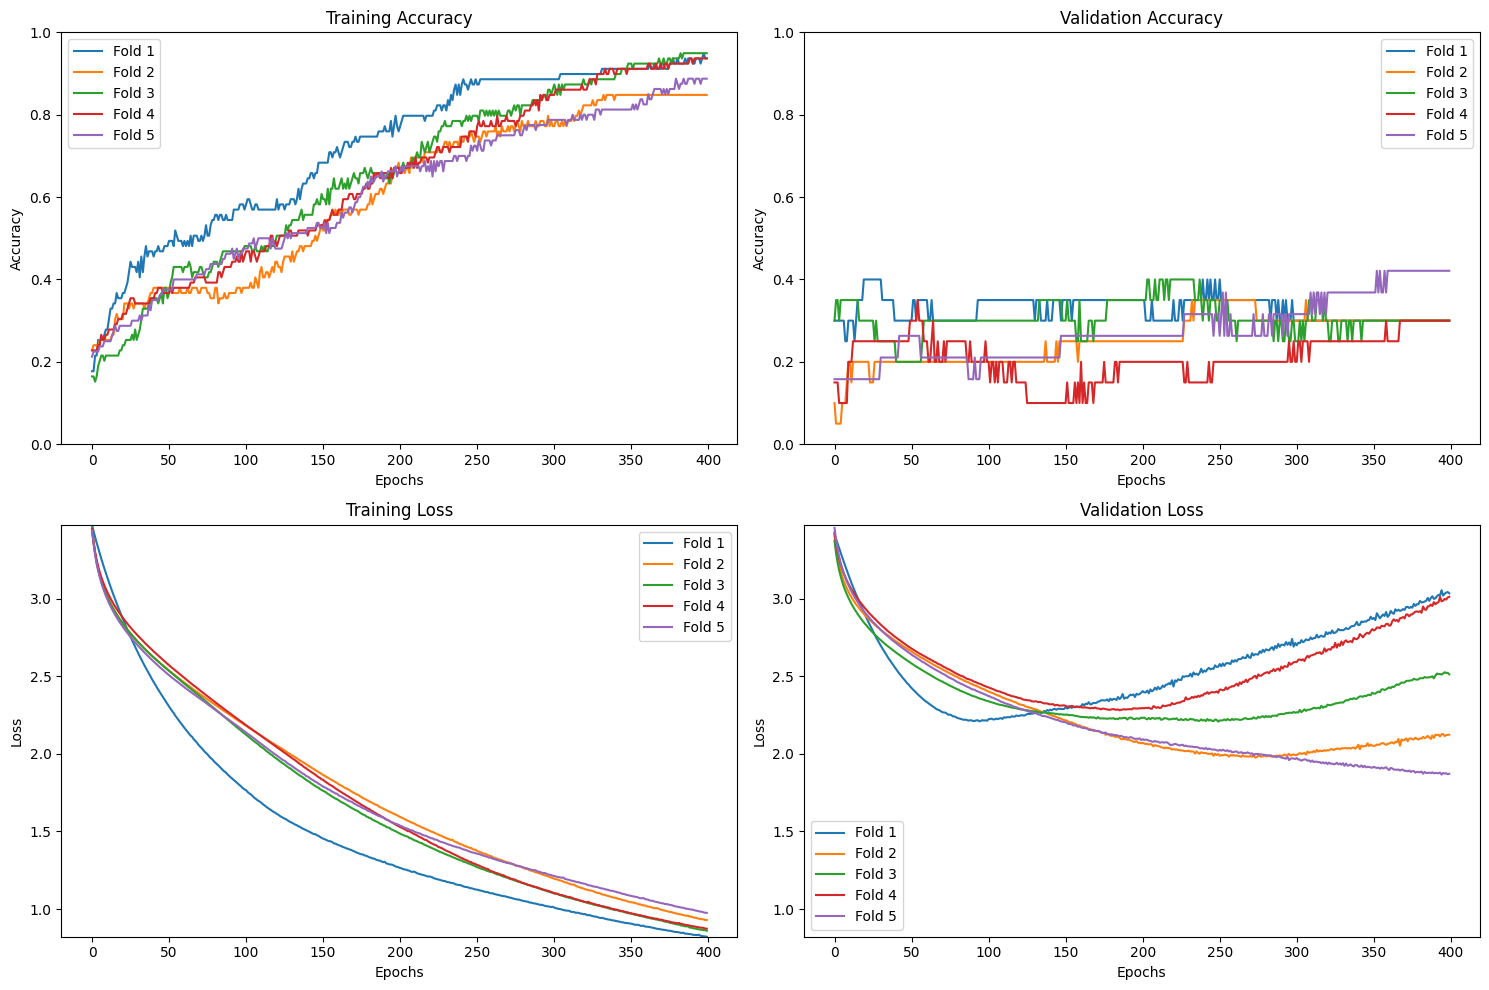

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted classes:       [0 3 2 2 0 0 3 0 2 2 1 4 1 1 3 0 4 0 3]
true validation classes: [4 0 4 2 2 0 3 1 2 0 2 4 4 3 3 4 1 0 3]


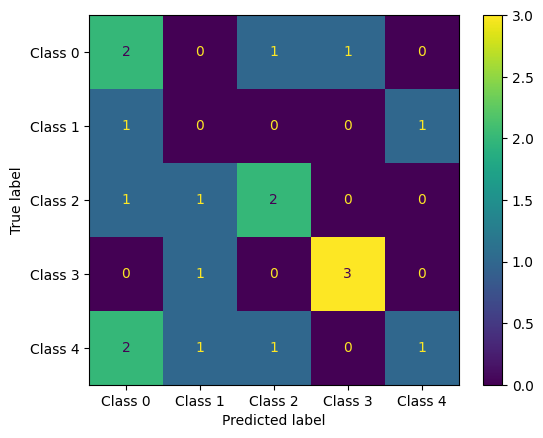

In [128]:
reset_weights(model1c)
crossvalidate(pca_train_df, model1c, pc, 'pond',kf,400,True)


### Test    

In [130]:
X_train_c = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_c = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4800 - loss: 1.9128
[1.9127910137176514, 0.47999998927116394]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted values: [1 2 2 1 1 1 4 0 2 4 4 3 4 0 4 2 1 0 0 3 3 1 1 3 4]
True values: [3 0 2 1 3 1 0 1 2 2 4 3 4 0 4 1 3 0 2 4 0 1 4 3 2]


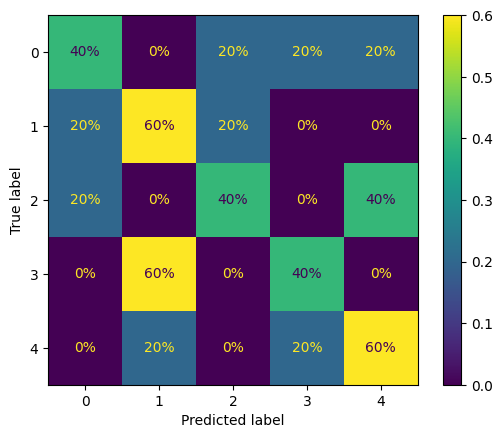

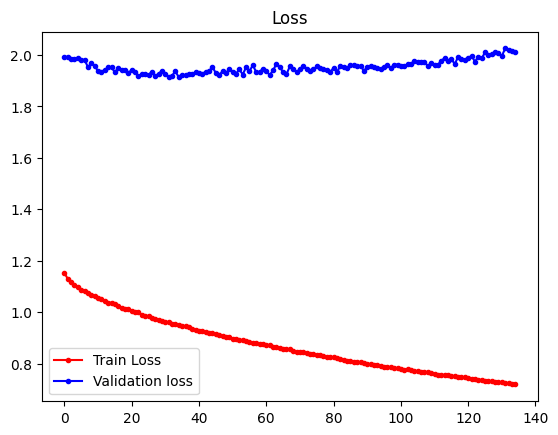

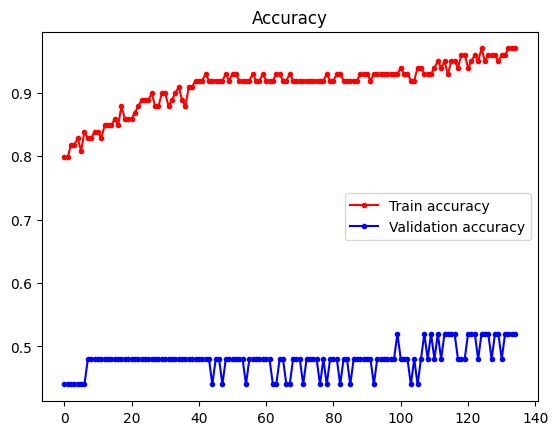

In [131]:
history1c=model1c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model1c, history1c, X_test_c, y_test)

# 3 Classes

In [132]:
y = df_train_val['pond_3']
y.reset_index(drop=True, inplace=True)
pca_train_df['pond'] = y

## Dense model

In [133]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(128, input_shape=(n_components,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(64, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#mode31.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(8, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dense(3, activation ='softmax'))

model3.summary()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)               │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,107 (43.39 KB)

 Trainable params: 11,107 (43.39 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7000 - loss: 1.3749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted classes:       [1 1 2 2 2 2 0 0 1 1 1 2 2 2 2 2 2 1 2 2]
true validation classes: [1 1 1 2 2 0 1 1 1 1 1 2 2 2 0 2 2 1 1 2]
mean confidence score: 643.8489, sd confidence score: 1915.7117
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5500 - loss: 1.8779
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [1 2 1 2 2 1 2 2 1 2 2 1 2 2 2 2 1 1 2 0]
true validation classes: [0 0 0 2 2 0 0 2 1 0 1 1 2 2 0 2 1 1 2 1]
mean confidence score: 2892.8407, sd confidence score: 8595.0293
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8000 - loss: 0.9775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [1 1 1 2 2 2 2 1 1 2 1 1 2 2 2 1 1 1 2 1]
true validation classes: [1 1 2 2 0 2 0 1 0 2 1 1 2 2 2 1 1 1 2 1]
mean confidence score: 4428.8114, sd confidence sco

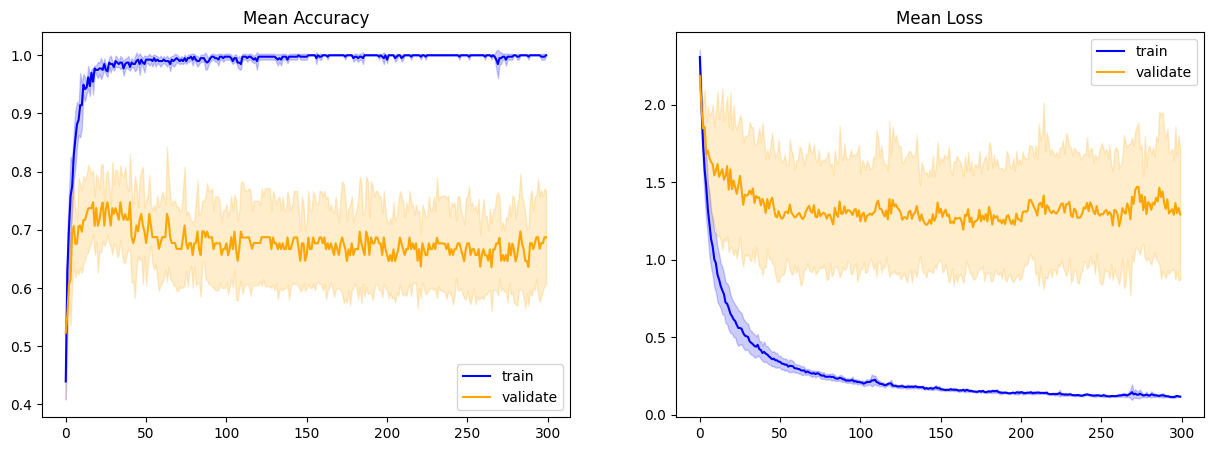

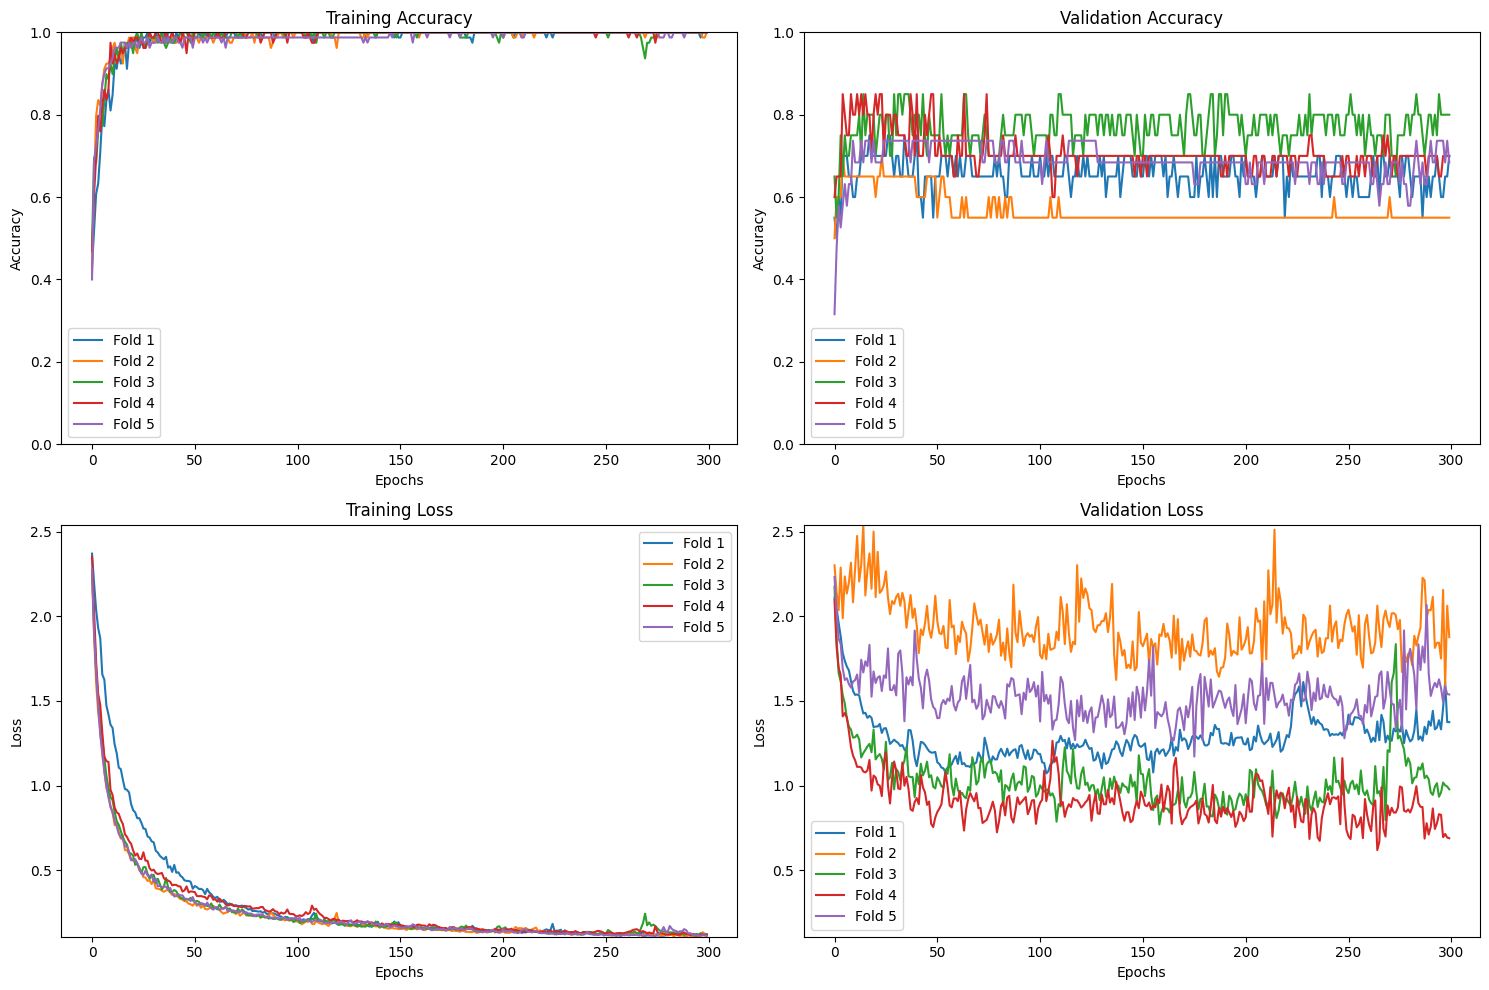

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted classes:       [1 0 2 2 0 0 1 1 2 0 0 2 2 1 0 0 2 0 1]
true validation classes: [2 0 2 2 2 0 1 1 2 0 2 2 2 1 1 2 1 0 1]


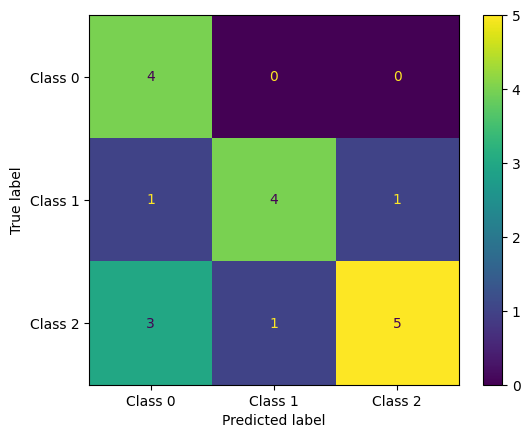

In [134]:
crossvalidate(pca_train_df, model3, pc, 'pond',kf,300)

### Test

In [136]:
X_train = pca_train_df[pc]
y_train = pca_train_df['pond']
y_train = keras.utils.to_categorical(y_train)
X_test = pca_test
y_test = df_test['pond_3']
y_test = keras.utils.to_categorical(y_test)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4968 - loss: 2.2798 - val_accuracy: 0.6000 - val_loss: 2.0252
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 1.8453 - val_accuracy: 0.6000 - val_loss: 1.7998
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7062 - loss: 1.5249 - val_accuracy: 0.5600 - val_loss: 1.6959
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7741 - loss: 1.2931 - val_accuracy: 0.6000 - val_loss: 1.6184
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8092 - loss: 1.1981 - val_accuracy: 0.6800 - val_loss: 1.5723
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 1.0738 - val_accuracy: 0.5600 - val_loss: 1.6360
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 1.0434 - val_accuracy: 0.6800 - val_loss: 1.5322
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8902 - loss: 0.9371 - val_accuracy: 0.7200 - v

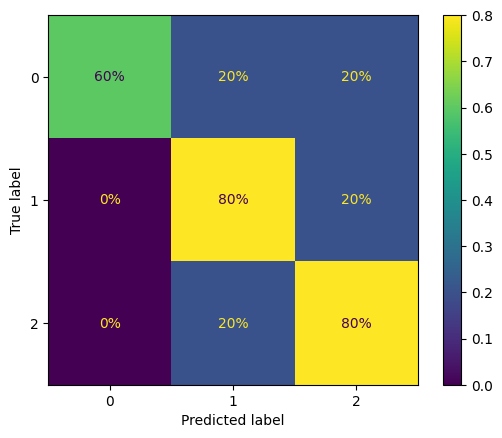

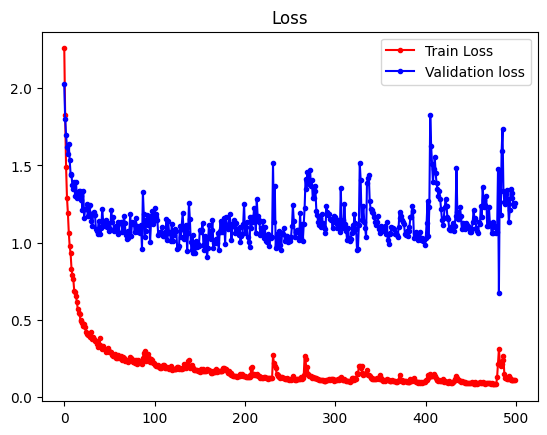

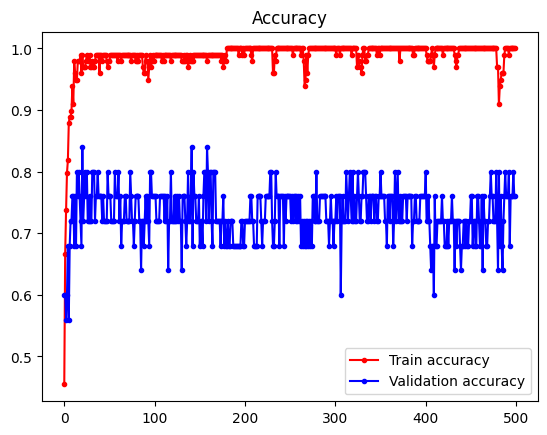

In [137]:
reset_weights(model3)
history3 = model3.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test))
evaluate_model(model3, history3, X_test, y_test)

## Convolution model    

In [155]:
model2c = keras.Sequential()
model2c.add(keras.layers.Conv1D(filters=6, kernel_size=3, activation='relu',input_shape = (n_components,1),kernel_regularizer=keras.regularizers.l2(0.01)))
#model2c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model2c.add(keras.layers.MaxPooling1D(pool_size = 2))
model2c.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model2c.add(Flatten())
model2c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model2c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))

model2c.add(keras.layers.Dropout(rate = 0.25))
model2c.add(keras.layers.Dense(16, activation = 'relu'))
model2c.add(keras.layers.Dense(3, activation ='softmax'))

model2c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model2c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 15, 6)          │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 7, 6)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 7, 64)          │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 32)             │        14,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,475 (64.36 KB)

 Trainable params: 16,475 (64.36 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5000 - loss: 2.1258
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
predicted classes:       [1 1 2 2 1 2 1 2 1 1 1 0 1 2 2 1 1 1 1 1]
true validation classes: [1 1 1 2 2 0 1 1 1 1 1 2 2 2 0 2 2 1 1 2]
mean confidence score: 142.2047, sd confidence score: 199.2238
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 2.3551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [2 2 1 2 2 1 0 2 1 2 2 1 0 2 2 2 1 0 2 2]
true validation classes: [0 0 0 2 2 0 0 2 1 0 1 1 2 2 0 2 1 1 2 1]
mean confidence score: 3533.1972, sd confidence score: 11603.071
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 1.5603
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [1 1 1 2 0 1 2 1 1 2 1 1 2 2 2 1 2 1 2 1]
true validation classes: [1 1 2 2 0 2 0 1 0 2 1 1 2 2 2 1 1 1 2 1]
mean confidence score: 398.6325, sd confidence score

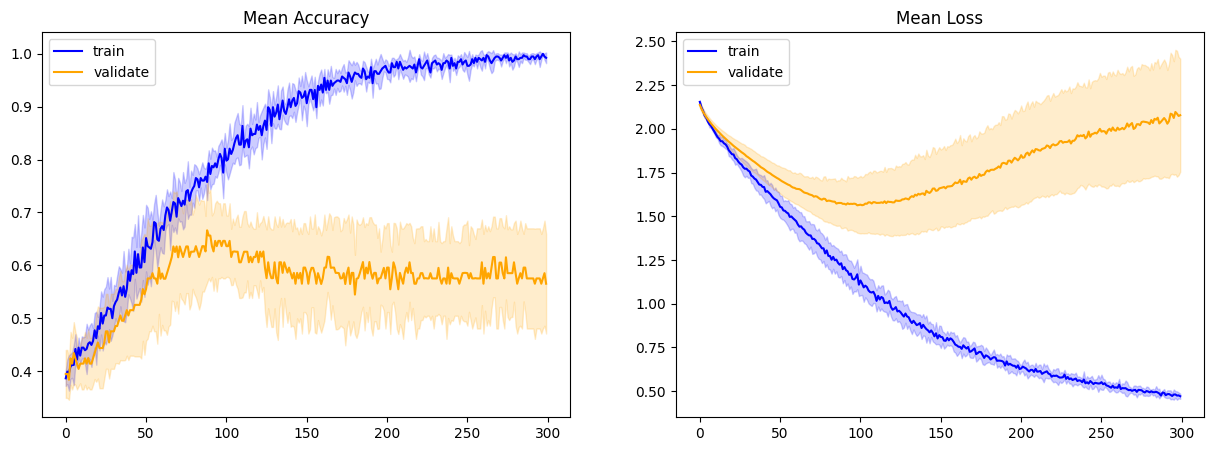

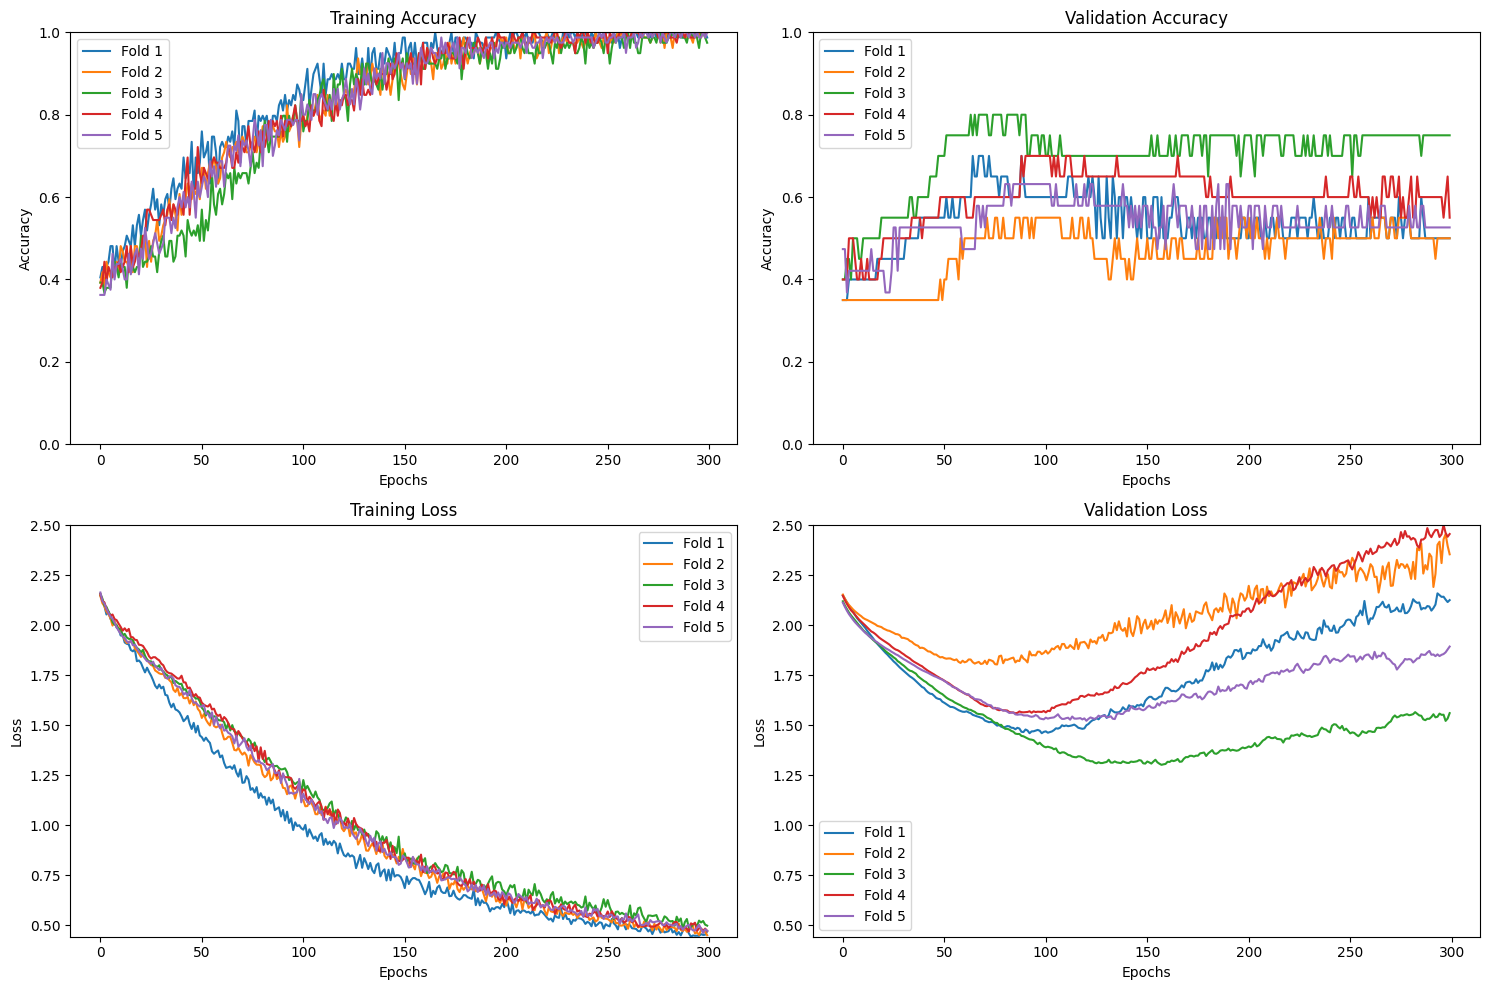

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
predicted classes:       [1 0 1 2 2 2 1 1 2 1 0 2 2 1 0 0 2 0 2]
true validation classes: [2 0 2 2 2 0 1 1 2 0 2 2 2 1 1 2 1 0 1]


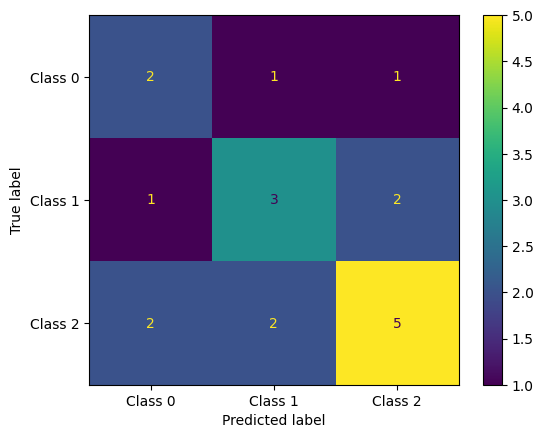

In [156]:
crossvalidate(pca_train_df, model2c, pc, 'pond',kf,300,True)

### test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7200 - loss: 1.0268
[1.0268065929412842, 0.7200000286102295]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted values: [1 2 2 1 1 2 0 1 2 2 1 1 2 1 2 1 1 1 0 2 0 1 1 1 2]
True values: [1 0 2 1 1 1 0 1 2 2 2 1 2 0 2 1 1 0 2 2 0 1 2 1 2]


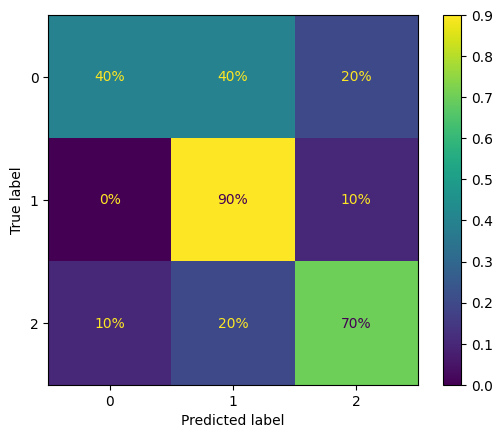

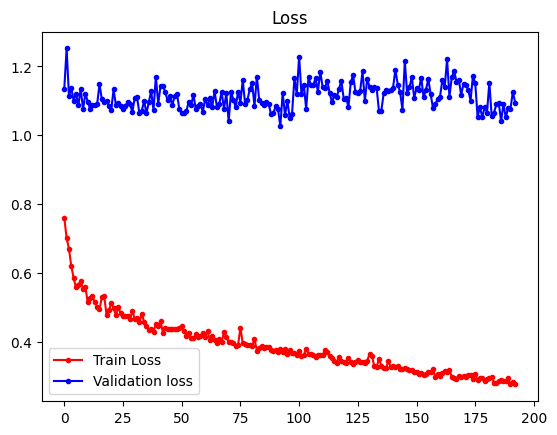

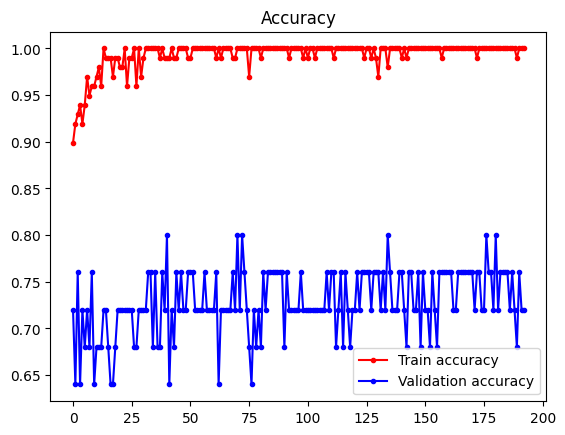

In [157]:
history2c=model2c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model2c, history2c, X_test_c, y_test)

# 2 Classes

## Dense model

In [158]:
y = df_train_val['pond_2']
y.reset_index(drop=True, inplace=True)
pca_train_df['pond'] = y

In [167]:
model4 = keras.Sequential()
model4.add(keras.layers.Dense(32, input_shape=(n_components,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Dense(32, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))

#mode4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Dense(16, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model4.add(keras.layers.Dense(2, activation ='softmax'))

model4.summary()
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)               │ (None, 32)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,194 (8.57 KB)

 Trainable params: 2,194 (8.57 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 2
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8000 - loss: 0.8160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
predicted classes:       [0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1]
true validation classes: [0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]
mean confidence score: 240763.7214, sd confidence score: 1004856.8517
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8500 - loss: 0.8197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0]
true validation classes: [0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0]
mean confidence score: 3244.1816, sd confidence score: 8110.588
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8000 - loss: 0.7134
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0]
true validation classes: [0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0]
mean confidence score: 1778.9702, sd confidenc

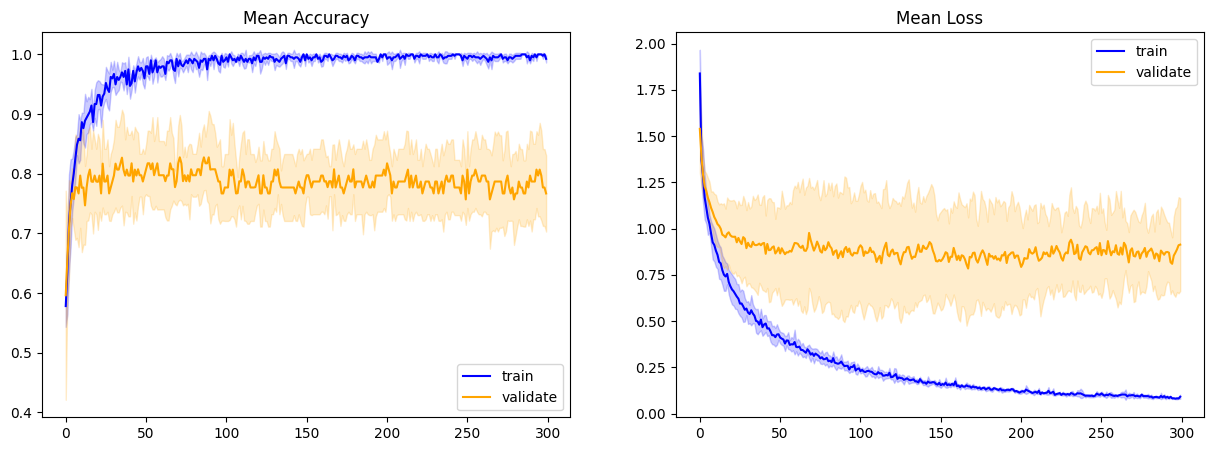

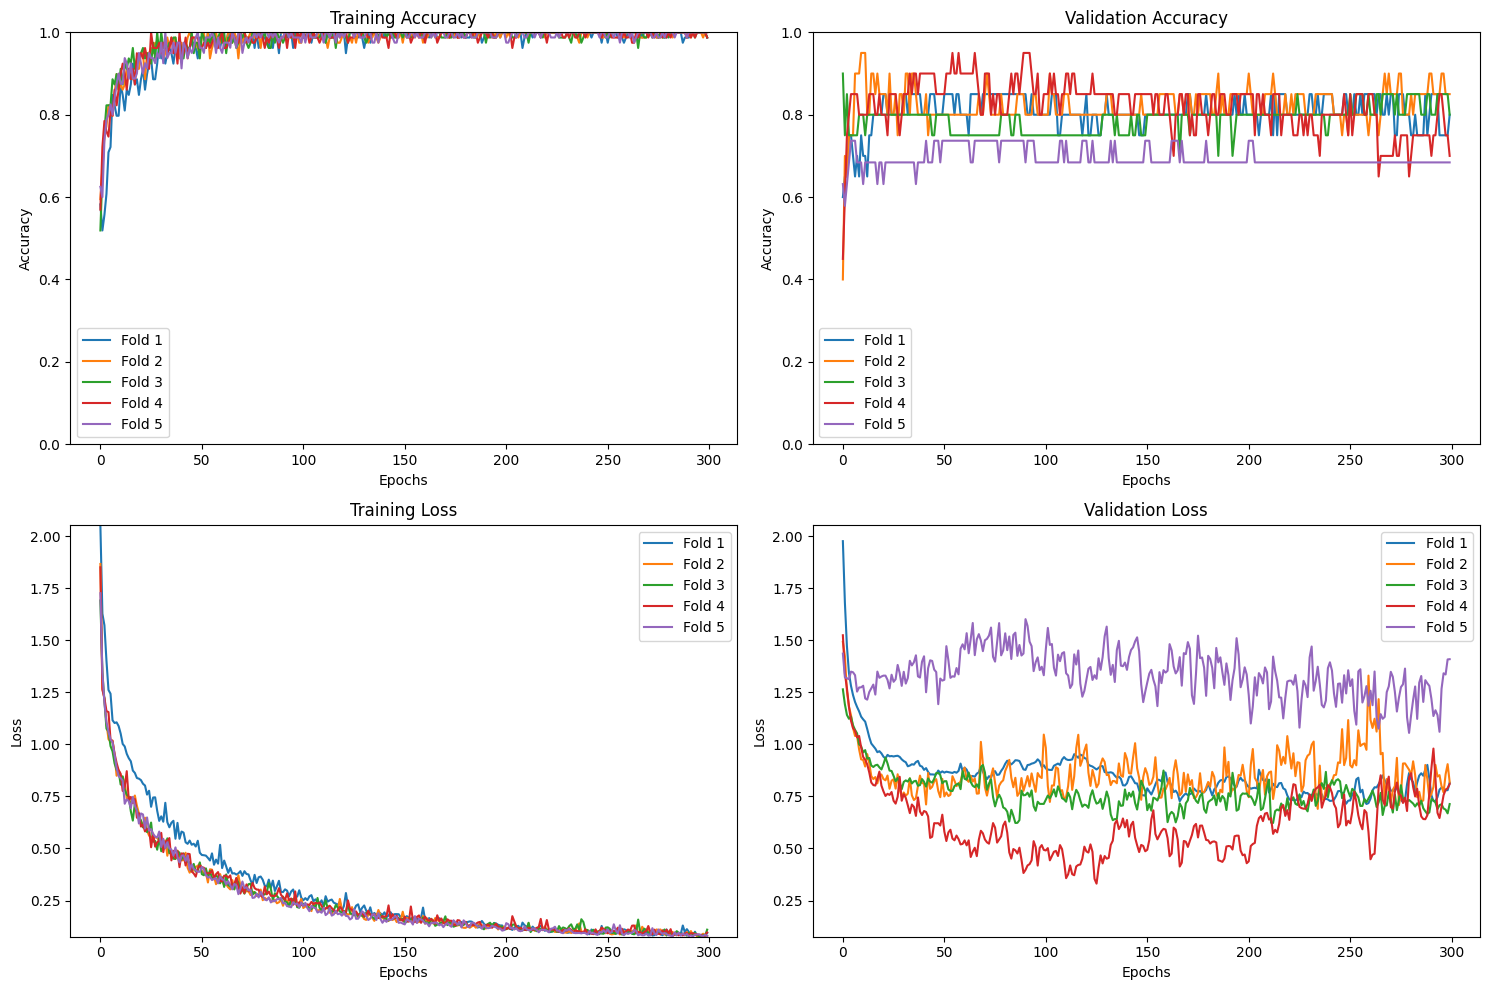

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted classes:       [0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0]
true validation classes: [1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0]


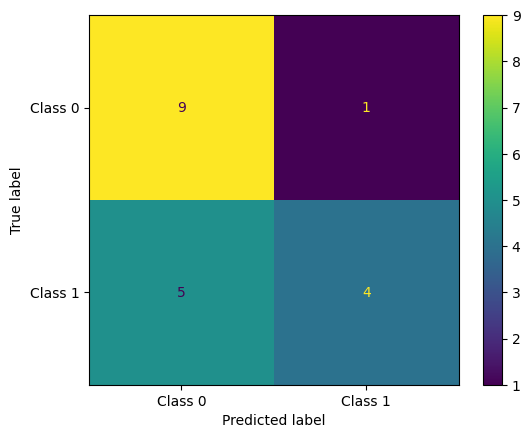

In [168]:
#reset_weights(model4)
crossvalidate(pca_train_df, model4, pc, 'pond',kf,300)

### Test

In [169]:
X_train = pca_train_df[pc]
y_train = pca_train_df['pond']
y_train = keras.utils.to_categorical(y_train)
X_test = pca_test
y_test = df_test['pond_2']
y_test = keras.utils.to_categorical(y_test)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9039 - loss: 0.4274 - val_accuracy: 0.7200 - val_loss: 0.8891
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.2438 - val_accuracy: 0.7600 - val_loss: 0.7682
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.1528 - val_accuracy: 0.7200 - val_loss: 0.8211
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.1662 - val_accuracy: 0.7600 - val_loss: 0.8743
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9624 - loss: 0.1493 - val_accuracy: 0.7600 - val_loss: 0.8412
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0996 - val_accuracy: 0.7600 - val_loss: 0.9248
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.1205 - val_accuracy: 0.8000 - val_loss: 0.8705
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.1050 - val_accuracy: 0.7600 - v

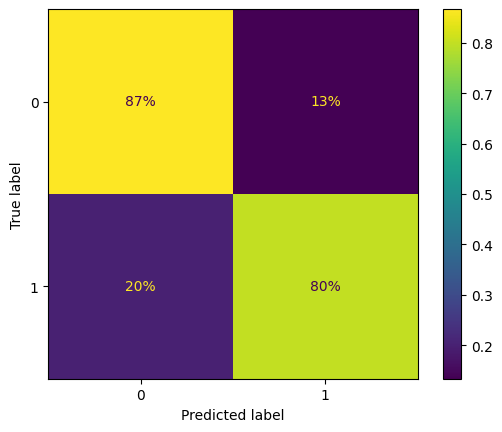

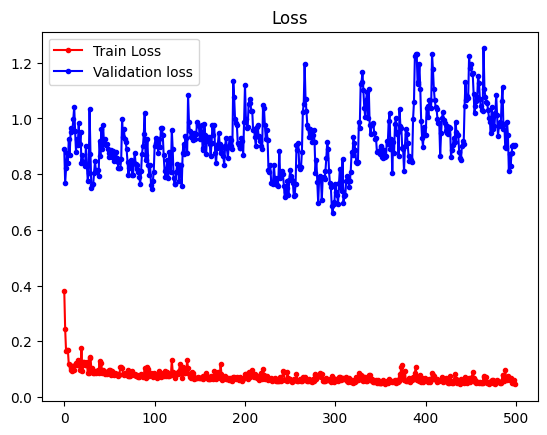

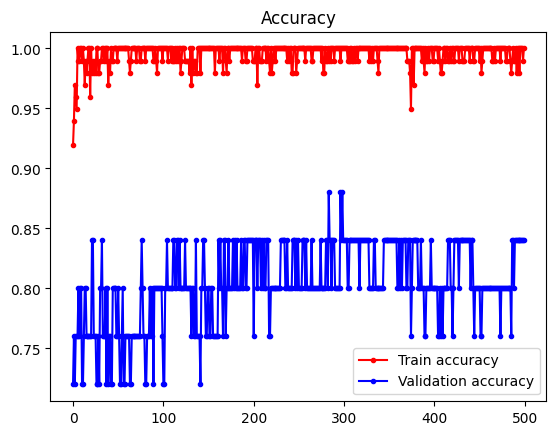

In [170]:
#  reset_weights(model4)
history3 = model4.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test))
evaluate_model(model4, history3, X_test, y_test)

## Convolution model

In [173]:
model3c = keras.Sequential()
model3c.add(keras.layers.Conv1D(filters=6, kernel_size=3, activation='relu',input_shape = (n_components,1),kernel_regularizer=keras.regularizers.l2(0.01)))
#model3c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model3c.add(keras.layers.MaxPooling1D(pool_size = 2))
model3c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model3c.add(Flatten())
model3c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model3c.add(keras.layers.Dropout(rate = 0.25))
model3c.add(keras.layers.Dense(16, activation = 'relu'))
model3c.add(keras.layers.Dense(8, activation = 'relu'))

model3c.add(keras.layers.Dense(2, activation ='softmax'))

model3c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model3c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 15, 6)          │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 7, 6)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 7, 32)          │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 32)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,130 (31.76 KB)

 Trainable params: 8,130 (31.76 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation


Number of classes: 2
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.7500 - loss: 0.7585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
predicted classes:       [0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0]
true validation classes: [0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]
mean confidence score: 780.2415, sd confidence score: 1974.0454
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8500 - loss: 1.1307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1]
true validation classes: [0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0]
mean confidence score: 619.1483, sd confidence score: 1638.0153
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8000 - loss: 0.5686
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted classes:       [0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0]
true validation classes: [0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0]
mean confidence score: 510.1144, sd confidence scor

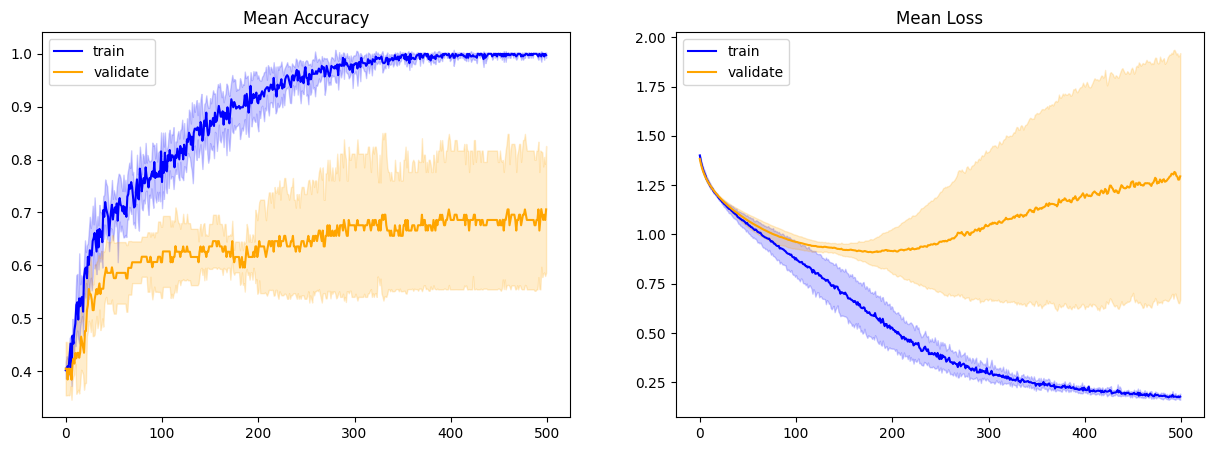

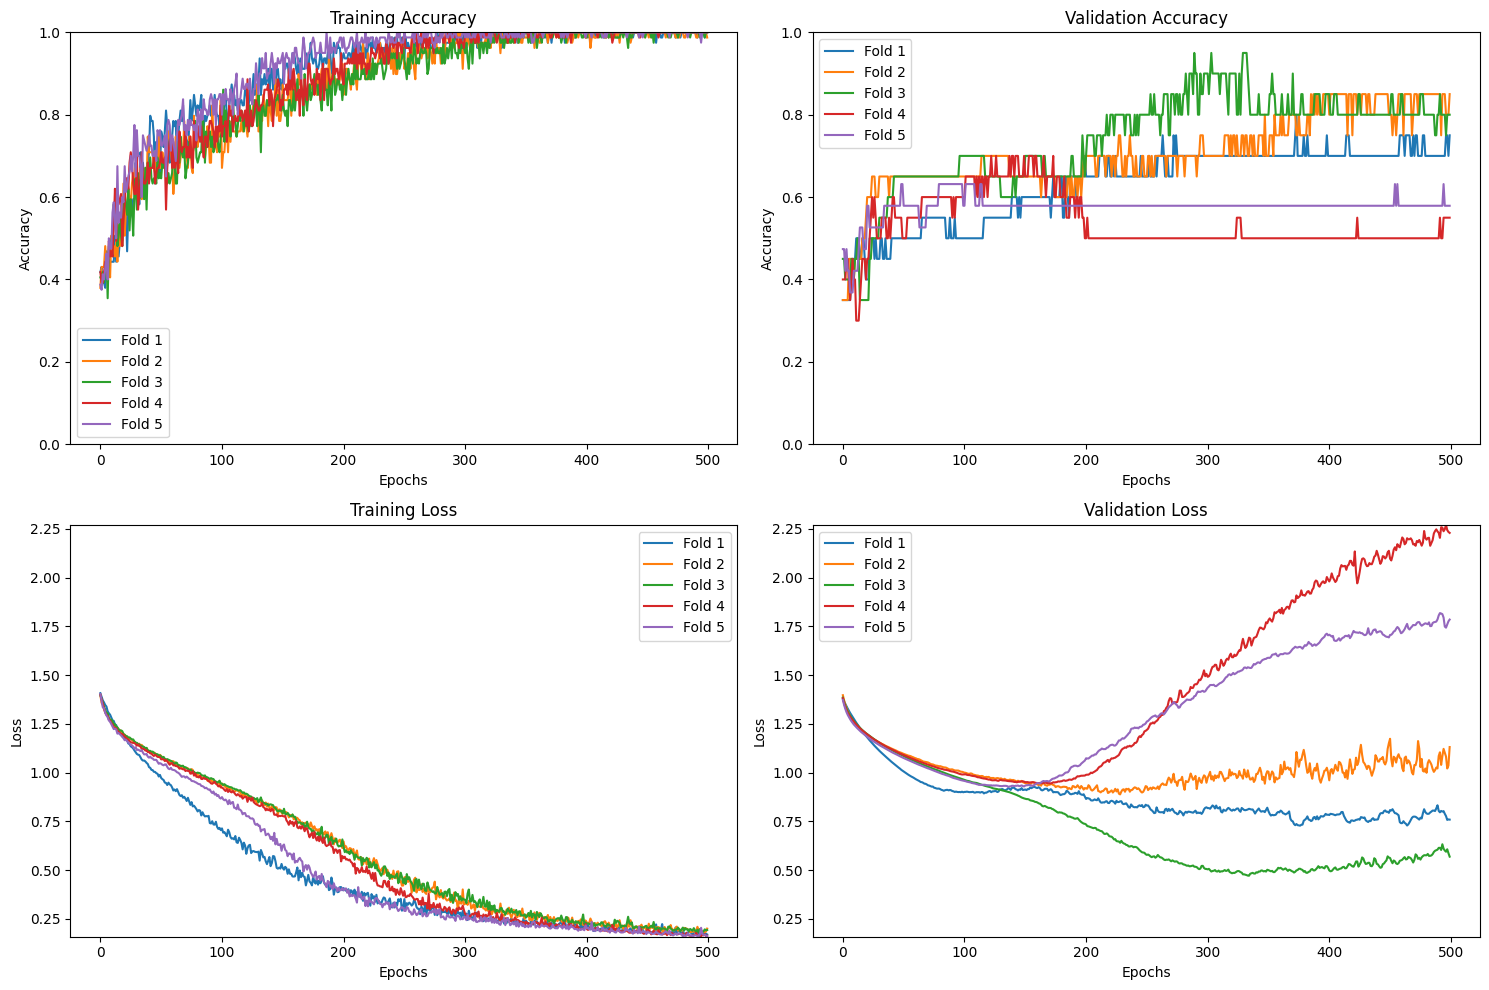

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted classes:       [0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0]
true validation classes: [1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0]


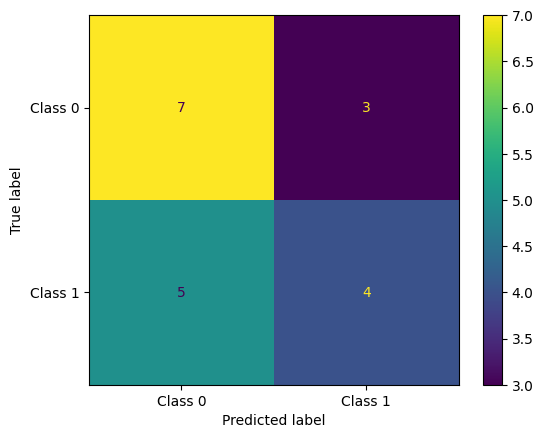

In [174]:
reset_weights(model3c)
crossvalidate(pca_train_df, model3c, pc, 'pond',kf,500,True)

### Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8000 - loss: 0.6520
[0.652021586894989, 0.800000011920929]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted values: [0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1]
True values: [0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1]


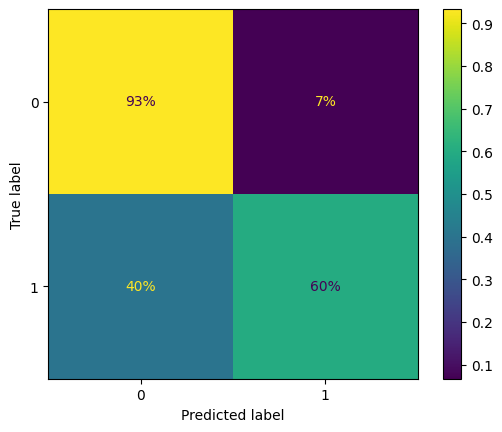

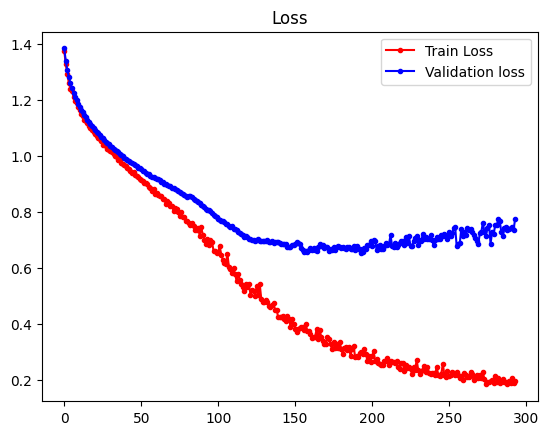

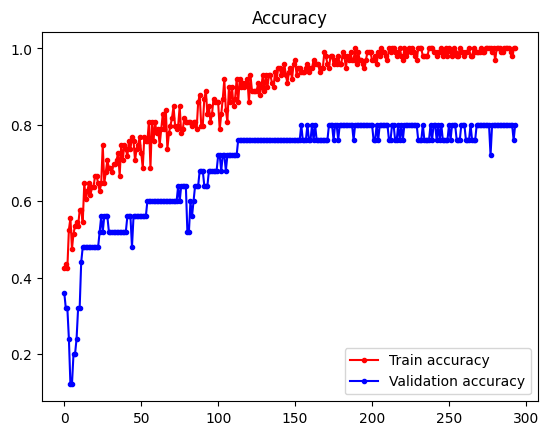

In [175]:
reset_weights(model3c)
history3c=model3c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model3c, history3c, X_test_c, y_test)